url = 'https://raw.githubusercontent.com/rodmsmendes/reinforcementlearning4fun/master/data/house_prices.csv'
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

# Collect the data

In [8]:
df = pd.read_csv("/content/drive/Shareddrives/Data Science/Spikes/03 CBA Project/ML WorkBook/house_prices.csv")
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
df_numeric = df.select_dtypes(include=['float64', 'int64']).dropna().copy()
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1121 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1121 non-null   int64  
 1   MSSubClass     1121 non-null   int64  
 2   LotFrontage    1121 non-null   float64
 3   LotArea        1121 non-null   int64  
 4   OverallQual    1121 non-null   int64  
 5   OverallCond    1121 non-null   int64  
 6   YearBuilt      1121 non-null   int64  
 7   YearRemodAdd   1121 non-null   int64  
 8   MasVnrArea     1121 non-null   float64
 9   BsmtFinSF1     1121 non-null   int64  
 10  BsmtFinSF2     1121 non-null   int64  
 11  BsmtUnfSF      1121 non-null   int64  
 12  TotalBsmtSF    1121 non-null   int64  
 13  1stFlrSF       1121 non-null   int64  
 14  2ndFlrSF       1121 non-null   int64  
 15  LowQualFinSF   1121 non-null   int64  
 16  GrLivArea      1121 non-null   int64  
 17  BsmtFullBath   1121 non-null   int64  
 18  BsmtHalfBath 

#  Preparing the data



The original dataset has 81 columns. Since I'm trying to use this dataset to show a simple example of machine learning in action I only need a few attributes to predict the SalePrice.
So I select the following features and create a new dataframe out of it.

LotArea -  Lot size in square feet

GrLivArea - Above grade (ground) living area square feet

YearBuilt - Original construction date

BedroomAbvGr - Number of bedrooms above basement level

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.




In [12]:
# Here I've only taken the features I want to use to predict the SalePrice.

df_select = df[["LotArea", "GrLivArea", "YearBuilt", "BedroomAbvGr", "SalePrice"]].rename(columns={"LotArea": "PropertySize", "GrLivArea": "LivingArea", "YearBuilt" : "YearBuilt", "BedroomAbvGr" : "Bedrooms", "SalePrice" : "Price"})


In [13]:
df_select.shape

(1460, 5)

In [14]:
#  Checked the data and there seems to be houses listed with 0 bedrooms.
# I removed these listings to keep this simple.

df_select = df_select.loc[df_select['Bedrooms'] != 0]
df_select.shape

(1454, 5)

## Explore the dataset in Excel
### https://docs.google.com/spreadsheets/d/1P0EQ0RRf-hZMdgR_wA53Z4JSDD9sJBtpE015TQInaFM/edit?usp=sharing


#### Create an Area vs Price dataframe

In [ ]:
# Save df_select as CSV to see values in excel.

# df_select.to_csv("multivariate_LR.csv", index_label= False)

In [15]:
Area_Price = df_select[["LivingArea", "Price"]]
display(Area_Price.head())
display(Area_Price.shape)


,LivingArea,Price
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


(1454, 2)

In [ ]:
# Save as CSV to see values in excel.

# Area_Price.to_csv("Area_Price.csv")

#### Create a Bedrooms vs Price dataframe

In [16]:
Bedrooms_Price = df_select[["Bedrooms", "Price"]]
display(Bedrooms_Price.head())
display(Bedrooms_Price.shape)

,Bedrooms,Price
0,3,208500
1,3,181500
2,3,223500
3,3,140000
4,4,250000


(1454, 2)

In [ ]:
# Save as CSV to see values in excel.

# Bedrooms_Price.to_csv("Bedrooms_Price.csv")

In [17]:
# Check for null values
df_select.isnull().sum()

,0
PropertySize,0
LivingArea,0
YearBuilt,0
Bedrooms,0
Price,0


# Choose a ML Model: Linear Regression Machine Learning Model with Single Variable

In [18]:
df_select.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1454 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   PropertySize  1454 non-null   int64
 1   LivingArea    1454 non-null   int64
 2   YearBuilt     1454 non-null   int64
 3   Bedrooms      1454 non-null   int64
 4   Price         1454 non-null   int64
dtypes: int64(5)
memory usage: 68.2 KB


In [19]:
from sklearn.linear_model import LinearRegression


In [24]:
LivingArea = df_select["LivingArea"]
Bedrooms = df_select["Bedrooms"]
Price = df_select["Price"]

print(LivingArea.shape)
print(Bedrooms.shape)
print(Price.shape)



(1454,)
(1454,)
(1454,)


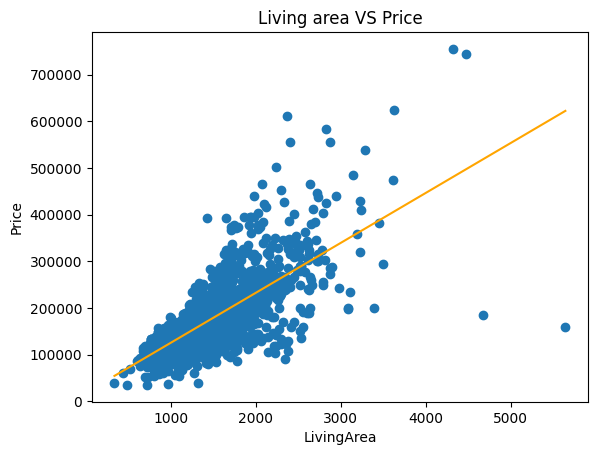

In [25]:
plt.title("Living area VS Price")
plt.xlabel('LivingArea')
plt.ylabel('Price')


plt.plot(np.unique(LivingArea), np.poly1d(np.polyfit(LivingArea, Price, 1))(np.unique(LivingArea)) , color='orange')

plt.scatter(LivingArea, Price)

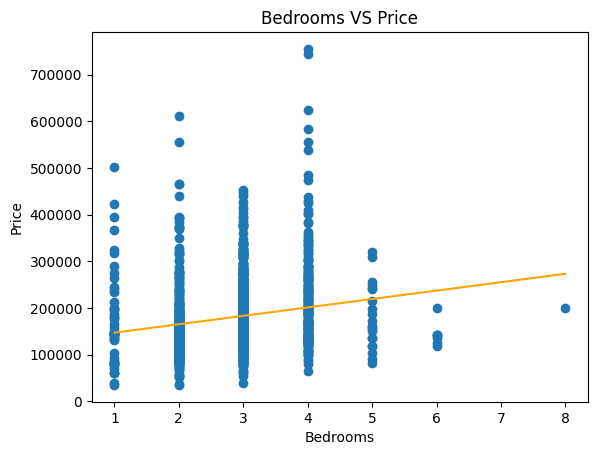

In [26]:
plt.title("Bedrooms VS Price")
plt.xlabel('Bedrooms')
plt.ylabel('Price')

plt.plot(np.unique(Bedrooms), np.poly1d(np.polyfit(Bedrooms, Price, 1))(np.unique(Bedrooms)), color='orange')

plt.scatter(Bedrooms, Price)

In [27]:
# Reshape the dfs to have value for the column instead of a null.

LivingArea = LivingArea.reshape(-1, 1)
Bedrooms = Bedrooms.reshape(-1, 1)
Price = Price.reshape(-1, 1)

print(LivingArea.shape)
print(Bedrooms.shape)
print(Price.shape)


AttributeError: 'Series' object has no attribute 'reshape'

In [ ]:
LivingArea

array([[1710],
       [1262],
       [1786],
       ...,
       [2340],
       [1078],
       [1256]])

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split


# Train the model

## Predict price based on size of house.

In [ ]:
LivingArea_train, LivingArea_test, Price_train, Price_test = train_test_split(LivingArea, Price, test_size=0.2, random_state=0)

x_train, X_test, y_train, Y_test

In [ ]:
LivingArea_train

array([[2144],
       [1716],
       [2402],
       ...,
       [1211],
       [1389],
       [1102]])

In [28]:
Price_train

NameError: name 'Price_train' is not defined

In [ ]:
# Train the model

reg_area = linear_model.LinearRegression()
reg_area.fit(LivingArea_train, Price_train)


LinearRegression()

# Evaluate the model

In [ ]:
# Predict values using test data.
reg_area_score = (reg_area.score(LivingArea_test, Price_test) * 100)
print("The accuracy of the ML model based on Living Area is:", reg_area_score , "%")


The accuracy of the ML model based on Living Area is: 39.56681169081373 %


In [ ]:
# Enter sqft area of the house you want to predict the price for.

LivingArea_Pred = 1710

pred_1 = reg_area.predict([[LivingArea_Pred]])

print(f"A {LivingArea_Pred} sqft house may cost: {pred_1} and is {reg_area_score}% accurate" )



A 1710 sqft house may cost: [[203064.51399547]] and is 39.56681169081373% accurate


## Predict price based on number of bedrooms.

In [ ]:
Bedrooms_train, Bedrooms_test, Price_train, Price_test = train_test_split(Bedrooms, Price, test_size=0.2, random_state=0)

In [ ]:
reg_bed = linear_model.LinearRegression()
reg_bed.fit(Bedrooms_train, Price_train)

LinearRegression()

In [ ]:
# Predict values using test data.
reg_bed_score = (reg_bed.score(Bedrooms_test, Price_test) * 100)
print(f"The accuracy of the ML model based on number of Bedrooms is: {reg_bed_score}%")


The accuracy of the ML model based on number of Bedrooms is: 6.372706384312943%


In [ ]:
# Enter number of bedrooms of the house you want to predict the price for.

Bedroom_Pred = 1

pred_2 = reg_bed.predict([[Bedroom_Pred]])

print("A house with", Bedroom_Pred, "bedroom(s) may cost:", * pred_2)

A house with 1 bedroom(s) may cost: [149445.81950124]


# Next steps:
## Tune and iteratively improve the model
## Deploy the model